# Introduction
This is a comprehensive Exploratory Data Analysis for the Mechanisms of Action (MoA) competition with python.

The data comes in the familiear shape of train and test files. In contrast to other competitions, here we have two separate files for the training predictors (train_features.csv) and the targets (train_targets_scored.csv). Each row corresponds to a specific treatment. 

# Preparations

In [19]:
import pandas as pd
from IPython.display import display
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns




# Overview: File structure and content
To start, we’ll get a quick overview of the datasets and their shapes. The tables below are interactive and cover all columns for the first 50 rows:

In [2]:
train = pd.read_csv("~/Downloads/train_features.csv")

In [3]:
# Assuming 'train' is your DataFrame
train_head = train.head()

# Display the first 50 rows interactively
display(train_head)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
number_of_rows = train.shape[0]
number_of_columns = train.shape[1]

# Using f-string to create the formatted string
result = f"Number of rows: {number_of_rows}; Number of columns: {number_of_columns}"

print(result)

Number of rows: 23814; Number of columns: 876


In [5]:
# Number of columns starting with 'g-'
g_features_count = train.filter(regex='^g-').shape[1]

# Number of columns starting with 'c-'
c_features_count = train.filter(regex='^c-').shape[1]

# Using f-string to create the formatted string
result = f'Number of "g-" features: {g_features_count}; Number of "c-" features: {c_features_count}'

print(result)

Number of "g-" features: 772; Number of "c-" features: 100


<div class="alert alert-block alert-info">

We find:

This is a rather wide dataset with almost 900 columns. From the data description we learn that features starting with “g-” encode gene expression data (there are 772 of those), and features starting with “c-” (100 in total) show cell viability data.

In addition, we have 3 “cp_” features: cp_type incidates the sample treatment, while cp_time and cp_dose encode the duration and dosage of the treatment.

The sig_id is the unique primary key of the sample.
</div>

# Individual feature visualisations
We start by plotting the distributions of the various predictor and target features individually, before moving on to multi-feature visuals and correlations. Here, we’re dealing with the features group by group.

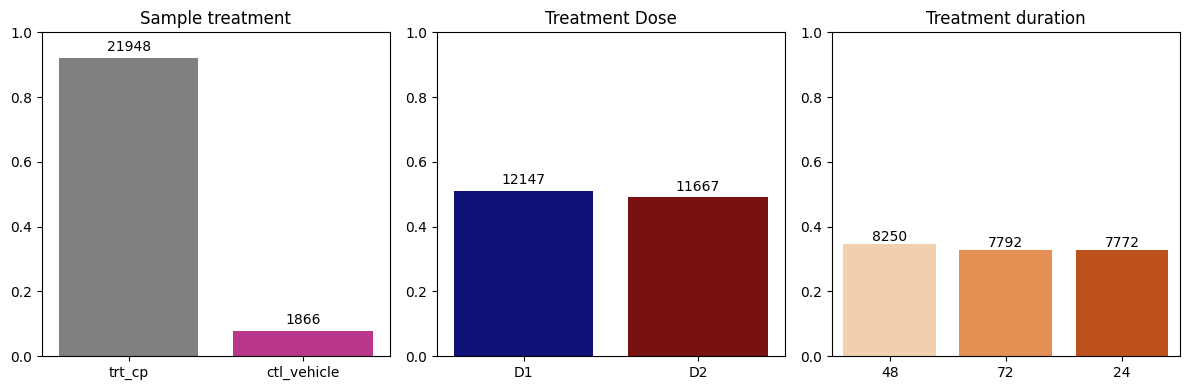

In [6]:

# Plot 1: Sample Treatment
p1_data = train['cp_type'].value_counts().reset_index()
p1_data.columns = ['cp_type', 'n']
p1_data['total'] = p1_data['n'].sum()
p1_data['perc'] = p1_data['n'] / p1_data['total']

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.barplot(data=p1_data, x='cp_type', y='perc', hue='cp_type', palette=['grey', '#D02090'])
plt.ylim(0, 1)
plt.ylabel('')
plt.xlabel('')
plt.title('Sample treatment')
for index, row in p1_data.iterrows():
    plt.text(row.name, row.perc + 0.02, f"{row['n']}", color='black', ha="center")

# Check if the legend exists and remove it
legend = plt.gca().get_legend()
if legend:
    legend.remove()

# Plot 2: Treatment Dose
p2_data = train['cp_dose'].value_counts().reset_index()
p2_data.columns = ['cp_dose', 'n']
p2_data['total'] = p2_data['n'].sum()
p2_data['perc'] = p2_data['n'] / p2_data['total']

plt.subplot(1, 3, 2)
sns.barplot(data=p2_data, x='cp_dose', y='perc', hue='cp_dose', palette=['darkblue', 'darkred'])
plt.ylim(0, 1)
plt.ylabel('')
plt.xlabel('')
plt.title('Treatment Dose')
for index, row in p2_data.iterrows():
    plt.text(row.name, row.perc + 0.02, f"{row['n']}", color='black', ha="center")

# Check if the legend exists and remove it
legend = plt.gca().get_legend()
if legend:
    legend.remove()

# Plot 3: Treatment Duration
p3_data = train['cp_time'].value_counts().reset_index()
p3_data.columns = ['cp_time', 'n']
p3_data['total'] = p3_data['n'].sum()
p3_data['perc'] = p3_data['n'] / p3_data['total']
p3_data['cp_time'] = p3_data['cp_time'].astype(str)

plt.subplot(1, 3, 3)
sns.barplot(data=p3_data, x='cp_time', y='perc', hue='cp_time', palette='Oranges')
plt.ylim(0, 1)
plt.ylabel('')
plt.xlabel('')
plt.title('Treatment duration')
for index, row in p3_data.iterrows():
    plt.text(row.name, row.perc + 0.01, f"{row['n']}", color='black', ha="center")

# Check if the legend exists and remove it
legend = plt.gca().get_legend()
if legend:
    legend.remove()
    
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">

We find:

The vast majority of treatments are compund treatments (“trt_cp”), compared to about 8% of control pertubation treatements (“ctl_vehicle”). Controls have no MoAs.

The treatment dose has two categories, D1 vs D2, which encode high vs low doses. Those are approximately evenly balanced, as are the 3 treatment duration categories of 24h, 48h, or 72h.
</div>

### Gene Expression Features:

Those are essentially anonymised features, labelled from “g-0” to “g-771”. Their values are numeric, so let’s look at the densities for the first 4 gene features as an example:

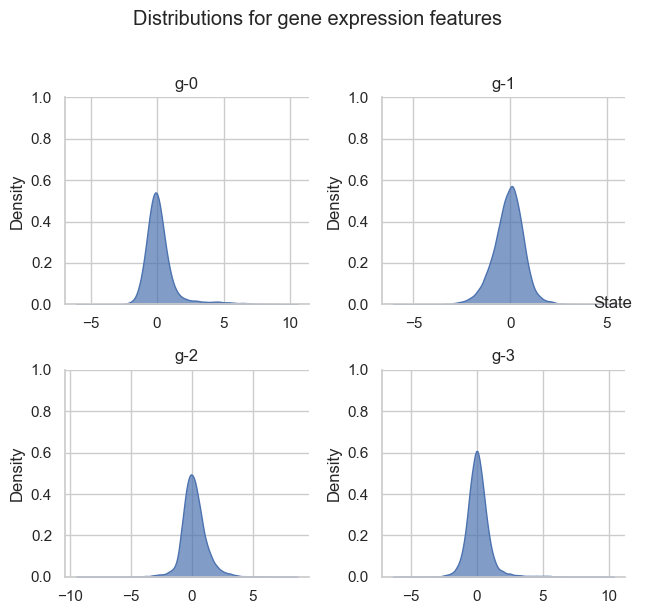

In [7]:
# Select 'sig_id' and columns starting with 'g-', then select the first 5 'g-' columns
selected_data = train.loc[:, ['sig_id'] + [col for col in train.columns if col.startswith('g-')][:4]]

# Pivot the DataFrame from wide to long format
long_data = pd.melt(selected_data, id_vars=['sig_id'], var_name='feature', value_name='value')

# Plotting
# plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Define a color palette
palette = sns.color_palette("Set2", n_colors=5)

g = sns.FacetGrid(long_data, col="feature", col_wrap=2, sharex=False, sharey=False, palette = palette)
g.map(sns.kdeplot, "value", fill=True, alpha=0.7)

# Customize the plots to resemble the R theme
g.set_titles("{col_name}")
g.set_axis_labels("", "Density")
g.set(yticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])  # Adjust as needed for y-axis scale
g.add_legend(title='State')
for ax in g.axes.flatten():
    ax.set_ylabel('Density')

plt.suptitle('Distributions for gene expression features', y=1.02)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">

We find:

Those distributions look pretty normal, which is good. There’s a bit of skew in some of them, but nothing that should warrant a transformation.
</div>

Similar to the gene features, the cell viability features are anonymous, labelled from “c-0” to “c-99”; 100 features. Their distributions look as follows:

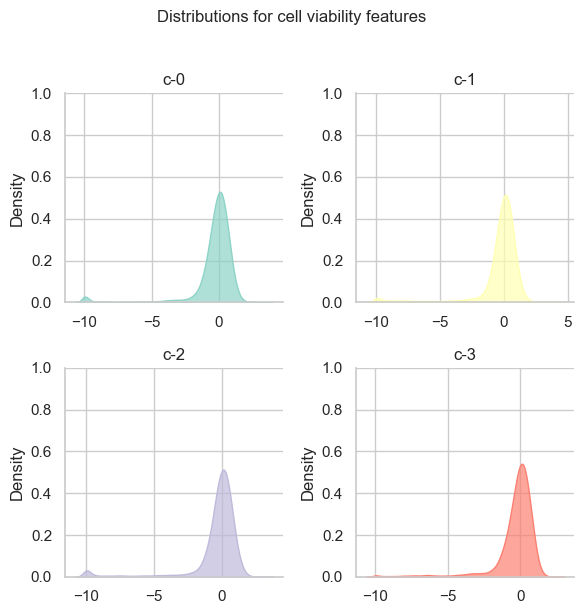

In [8]:
# Select 'sig_id' and columns starting with 'c-', then select the first 5 'c-' columns
selected_data = train.loc[:, ['sig_id'] + [col for col in train.columns if col.startswith('c-')][:4]]

# Pivot the DataFrame from wide to long format
long_data = pd.melt(selected_data, id_vars=['sig_id'], var_name='feature', value_name='value')

# Plotting
# plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Define a color palette using "Set3"
palette = sns.color_palette("Set3", 5)

# Create the FacetGrid
g = sns.FacetGrid(long_data, col="feature", col_wrap=2, sharex=False, sharey=False)

# Map kdeplot with distinct colors from the Set3 palette
for i, ax in enumerate(g.axes.flatten()):
    feature = long_data['feature'].unique()[i]
    subset = long_data[long_data['feature'] == feature]
    sns.kdeplot(subset['value'], ax=ax, fill=True, alpha=0.7, color=palette[i])
    ax.set_title(feature)

# Customize the plots to resemble the R theme
g.set_axis_labels("", "Density")
g.set(yticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])  # Adjust as needed for y-axis scale
for ax in g.axes.flatten():
    ax.set_ylabel('Density')

plt.suptitle('Distributions for cell viability features', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">

We find:

Also reasonably normal, but with notable bumps around values of -10. Are those genuine? Worth looking into this in more detail in the following.

In contrast to the gene data, none of those distributions goes even near values of positive 10. This might be a sampling effect, though, since both this panel and the gene facets are scaled to the global min & max within each four features.
</div>

Let’s zoom into the negative tails, and add 2 more features:

<Figure size 1200x800 with 0 Axes>

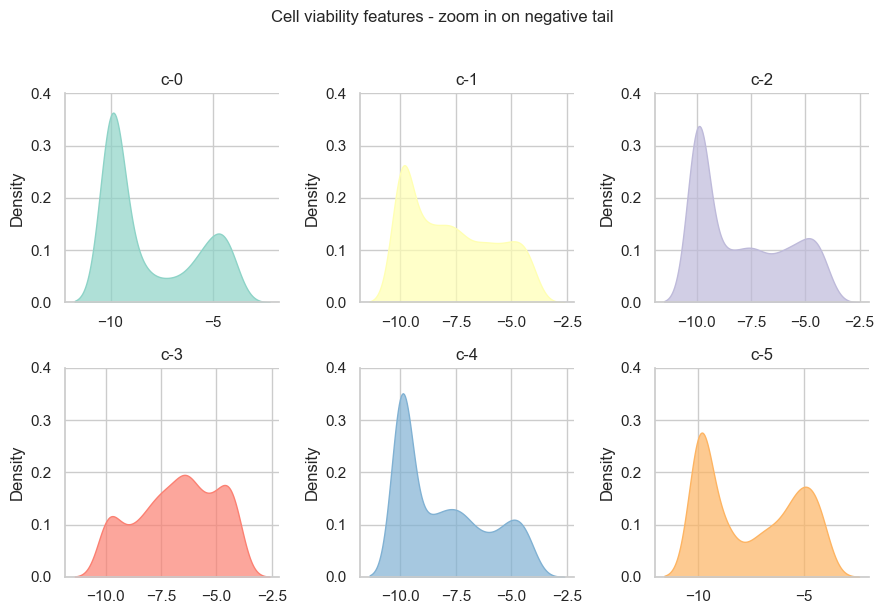

In [9]:
# Select 'sig_id' and columns starting with 'c-', then select the first 7 'c-' columns
selected_data = train.loc[:, ['sig_id'] + [col for col in train.columns if col.startswith('c-')][:6]]

# Pivot the DataFrame from wide to long format
long_data = pd.melt(selected_data, id_vars=['sig_id'], var_name='feature', value_name='value')

# Filter the data for values less than -4
filtered_data = long_data[long_data['value'] < -4]

# Plotting
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Define a color palette using "Set3"
palette = sns.color_palette("Set3", 7)

# Create the FacetGrid with a layout that fits all 7 features
g = sns.FacetGrid(filtered_data, col="feature", col_wrap=3, sharex=False, sharey=False)

# Map kdeplot with distinct colors from the Set3 palette
for i, ax in enumerate(g.axes.flatten()):
    feature = filtered_data['feature'].unique()[i]
    subset = filtered_data[filtered_data['feature'] == feature]
    sns.kdeplot(subset['value'], ax=ax, fill=True, alpha=0.7, color=palette[i])
    ax.set_title(feature)

# Customize the plots to resemble the R theme
g.set_axis_labels("", "Density")
g.set(yticks=[0, 0.1, 0.2, 0.3, 0.4])  # Adjust as needed for y-axis scale
for ax in g.axes.flatten():
    ax.set_ylabel('Density')

plt.suptitle('Cell viability features - zoom in on negative tail', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()



<div class="alert alert-block alert-info">

We find:

Those tails are definitely significant. Even in the cases where the densities don’t rise near -10, the distributions look far from normal.

Several of the features look almost multimodal. This could become a useful consideration for preprocessing steps.

</div>



# Multiple feature interaction visuals

Now that we have a much better idea of how the individual features behave, let’s study their interactions. First, we will look at the different features within the same set, then expand our analysis to the interplay between those groups and their constituents. We will use the same order of feature sets as above.

### Treatment Features:
Comparing the 3 treatment features calls for a facet grid. Two features span the horizontal and vertical grid axes, the 3rd one defines the plot within each facet:

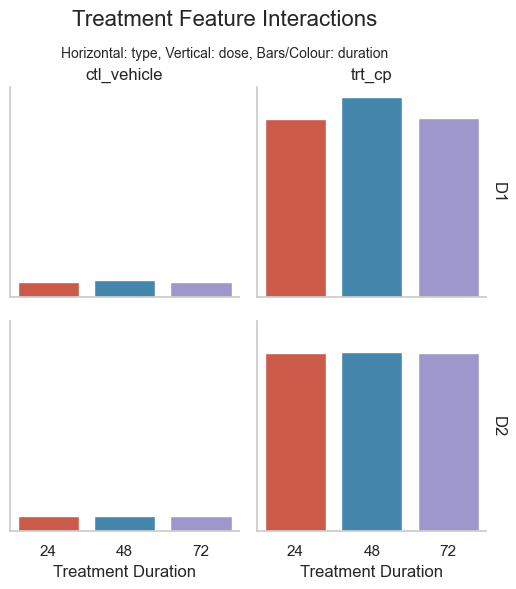

In [17]:
# Group by 'cp_type', 'cp_dose', and 'cp_time', then count occurrences
grouped_data = train.groupby(['cp_type', 'cp_dose', 'cp_time']).size().reset_index(name='n')

# Convert 'cp_time' to a categorical variable
grouped_data['cp_time'] = grouped_data['cp_time'].astype('category')

# Define the color palette using wesanderson
# palette = wesanderson.palettes['IsleofDogs1']
palette = ["#E24A33", "#348ABD", "#988ED5"]

# Plotting with seaborn
# plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

# Create a FacetGrid with 'cp_dose' as rows and 'cp_type' as columns
g = sns.FacetGrid(grouped_data, row='cp_dose', col='cp_type', margin_titles=True)

# Map the bar plot onto the FacetGrid
g.map_dataframe(sns.barplot, x='cp_time', y='n', hue='cp_time', palette=palette, dodge=False)

# Customize the plot to match the R plot
g.set_axis_labels("Treatment Duration", "Count")
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.set(yticks=[])

for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.legend().remove()

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Treatment Feature Interactions', fontsize=16)
g.fig.text(0.5, 0.9, 'Horizontal: type, Vertical: dose, Bars/Colour: duration', ha='center', fontsize=10)

plt.show()



<div class="alert alert-block alert-info">

We find:

The resulting picture is consistent with the overall view we saw above. Control treatments are similarly rare across doses and durations.

One noteable difference, however, is the slightly higher percentage of 48-hour treatments for D1 doses (for both control and compound), compared to the much more equally distributed D2 bars.
</div>



### Gene Expression Features:


Here’s where things might get messy, with 772 features in this group. On the bright side, whichever method works here should also work for the smaller set of cell viability features.

Let’s try something. Here are the correlations between the first 200 gene features. No labels (and no title, apparently), just colour coding for high correlations (blue) and anti-correlations (red):

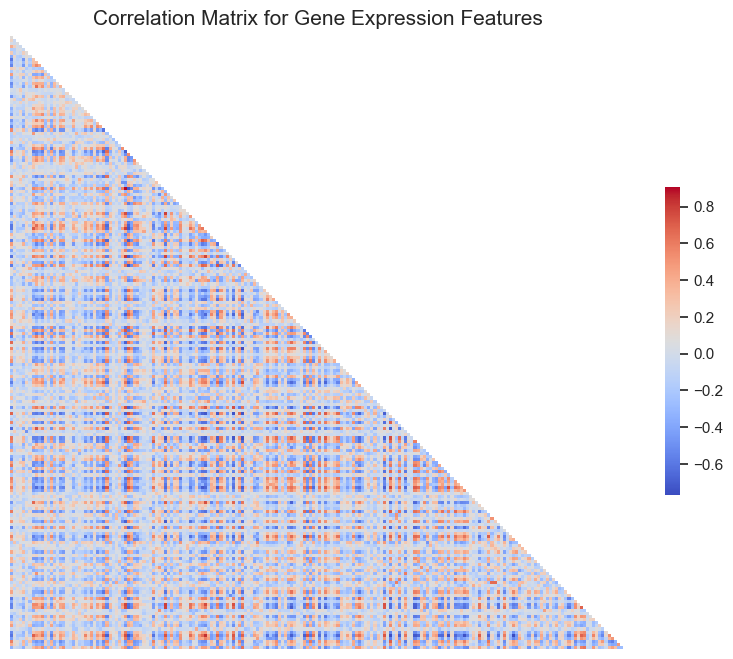

In [20]:
# Select columns starting with 'g-' and take the first 200 columns
selected_data = train.filter(regex='^g-').iloc[:, :200]

# Compute the Pearson correlation matrix
correlation_matrix = selected_data.corr(method='pearson')

# Plotting
plt.figure(figsize=(10, 8))

# Mask the upper triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap with seaborn
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=False, cbar_kws={"shrink": 0.5}, square=True)

# Remove the x and y axis tick labels
plt.xticks([])
plt.yticks([])

# Set title and show plot
plt.title('Correlation Matrix for Gene Expression Features', fontsize=15)
plt.show()


<div class="alert alert-block alert-info">

We find:

So, this is the big picture. It doesn’t tell us much about individual features, but there’s certainly some patterns to be seen.

It looks like there’s an order in which the features are at least somewhat correlated or anti-correlated; and we find that some features show very little correlation at all within those 25% of total columns.
</div>

Based on this overview, it should be sufficient to have a closer look at a subset of features. Behold: the closer look:



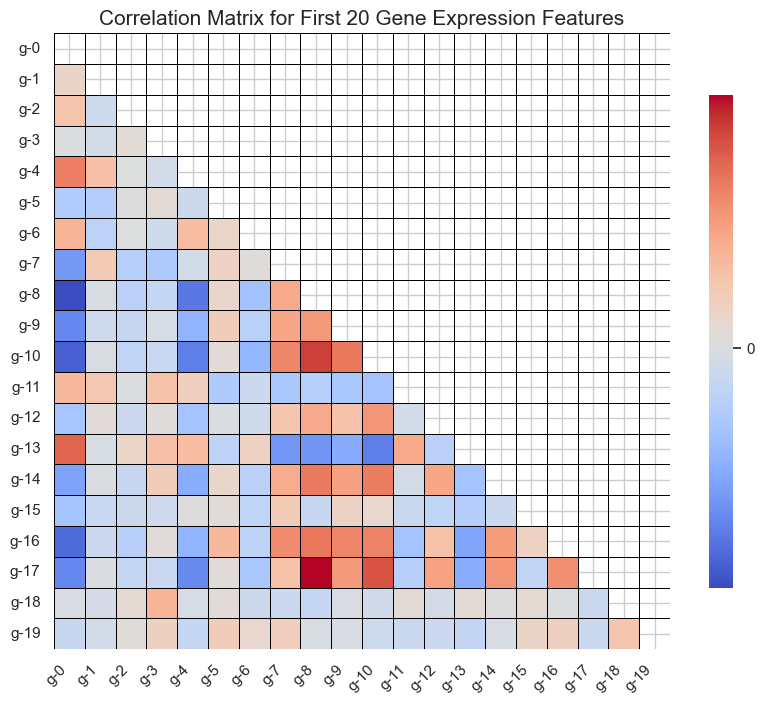

In [21]:
# Select columns starting with 'g-' and take the first 20 columns
selected_data = train.filter(regex='^g-').iloc[:, :20]

# Compute the Pearson correlation matrix
correlation_matrix = selected_data.corr(method='pearson')

# Plotting
plt.figure(figsize=(10, 8))

# Mask the upper triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap with seaborn
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=False, 
            cbar_kws={"shrink": 0.8, 'ticks': [-1, 0, 1]}, 
            square=True, linewidths=0.5, linecolor='black')

# Customize the plot
plt.title('Correlation Matrix for First 20 Gene Expression Features', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the plot
plt.show()


<div class="alert alert-block alert-info">

We find:

Here we have the first 20 gene features. Certain stronger correlations are apparent; such as “g-0” vs “g-8” (anti-correlation), or “g-8” vs “g-17”.

Features without much correlation include “g-18”, “g-19”, and also “g-2” and “g-3”.
</div>

Let’s look at some of these pairings in detail through scatterplots. Here, we pick 4 example pairs of features and plot them together with simple linear fits. The individual plot titles give the feature names and their Pearson correlation coefficient values:

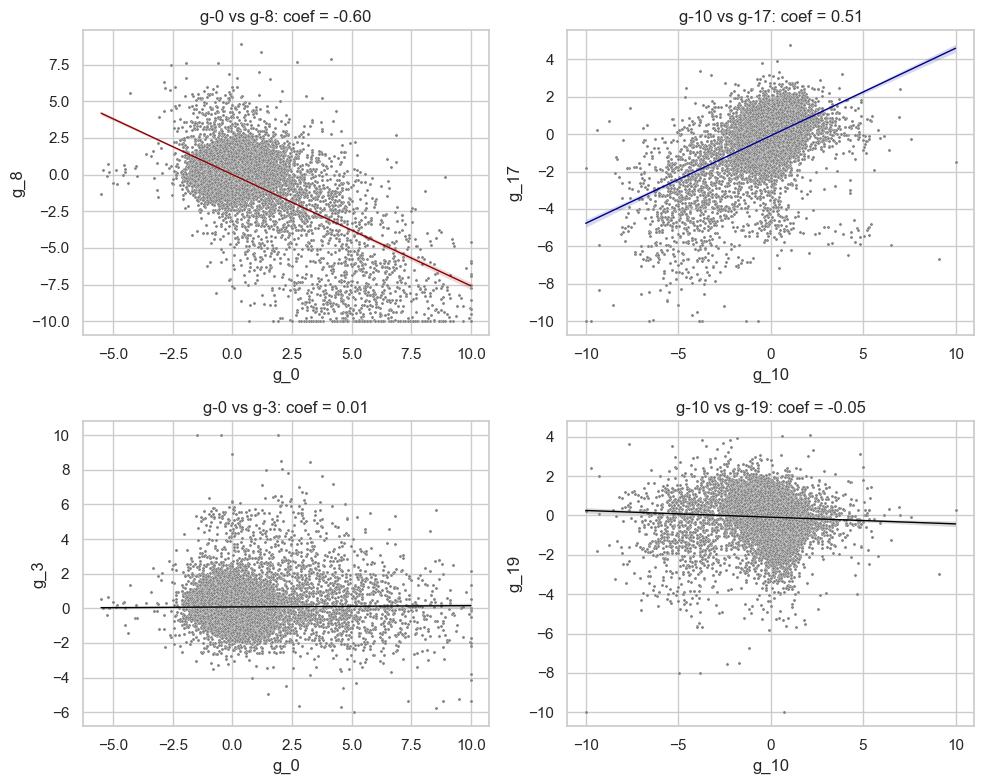

In [22]:
# Clean column names using pandas (if necessary)
train.columns = train.columns.str.replace('-', '_')

# Calculate correlation coefficients
corr_g0_g8 = np.corrcoef(train['g_0'], train['g_8'])[0, 1]
corr_g10_g17 = np.corrcoef(train['g_10'], train['g_17'])[0, 1]
corr_g0_g3 = np.corrcoef(train['g_0'], train['g_3'])[0, 1]
corr_g10_g19 = np.corrcoef(train['g_10'], train['g_19'])[0, 1]

# Plot 1: g_0 vs g_8
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x='g_0', y='g_8', data=train, color='grey', s=5)
sns.regplot(x='g_0', y='g_8', data=train, scatter=False, color='darkred', line_kws={'linewidth':1})
plt.title(f'g-0 vs g-8: coef = {corr_g0_g8:.2f}')
plt.xlabel('g_0')
plt.ylabel('g_8')

# Plot 2: g_10 vs g_17
plt.subplot(2, 2, 2)
sns.scatterplot(x='g_10', y='g_17', data=train, color='grey', s=5)
sns.regplot(x='g_10', y='g_17', data=train, scatter=False, color='darkblue', line_kws={'linewidth':1})
plt.title(f'g-10 vs g-17: coef = {corr_g10_g17:.2f}')
plt.xlabel('g_10')
plt.ylabel('g_17')

# Plot 3: g_0 vs g_3
plt.subplot(2, 2, 3)
sns.scatterplot(x='g_0', y='g_3', data=train, color='grey', s=5)
sns.regplot(x='g_0', y='g_3', data=train, scatter=False, color='black', line_kws={'linewidth':1})
plt.title(f'g-0 vs g-3: coef = {corr_g0_g3:.2f}')
plt.xlabel('g_0')
plt.ylabel('g_3')

# Plot 4: g_10 vs g_19
plt.subplot(2, 2, 4)
sns.scatterplot(x='g_10', y='g_19', data=train, color='grey', s=5)
sns.regplot(x='g_10', y='g_19', data=train, scatter=False, color='black', line_kws={'linewidth':1})
plt.title(f'g-10 vs g-19: coef = {corr_g10_g19:.2f}')
plt.xlabel('g_10')
plt.ylabel('g_19')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">

We find:

Those relationships are certainly not trivial. Even for the instances of near zero correlation, the shape of the point cloud is elongated and suggests multiple modes (e.g. “g-10” vs “g-19”).

The correlated features aren’t straightforward either: “g-0” vs “g-8” shows at least 2 different clusters of points together with a concentration at g-8 == -10. In “g-10” vs “g-17” we see a similar picture as for “g-10” vs “g-19”, only somewhat rotated to achieve a 0.5 correlation.
</div>

# Interactions between sets of features

In the previous section, we didn’t look at every single feature interaction among the numerous gene expression or cell viability columns, but we got a pretty good overview of the strength of correlations and studied a few specific examples in more detail. Now, let’s look at how the different sets of treatment, gene, and cell features interact with each other, before ultimately including the target features.

Here, we’ll look at interaction effects between features from the three different sets treatment, gene, and cell.

Let’s start with breaking down by treatment features the distributions of 4 gene and cell features that were chosen completely at random. (Or were they?) Here, the 4 features are arranged vertically while the treatment duration defines the horizonal facets. The treatment dose is colour-coded. The area where both distributions overlap is a mix between both colours:

/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_63304/1487158679.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['cp_time'] = 'Duration ' + selected_data['cp_time'].astype(str) + 'h'


<Figure size 1200x800 with 0 Axes>

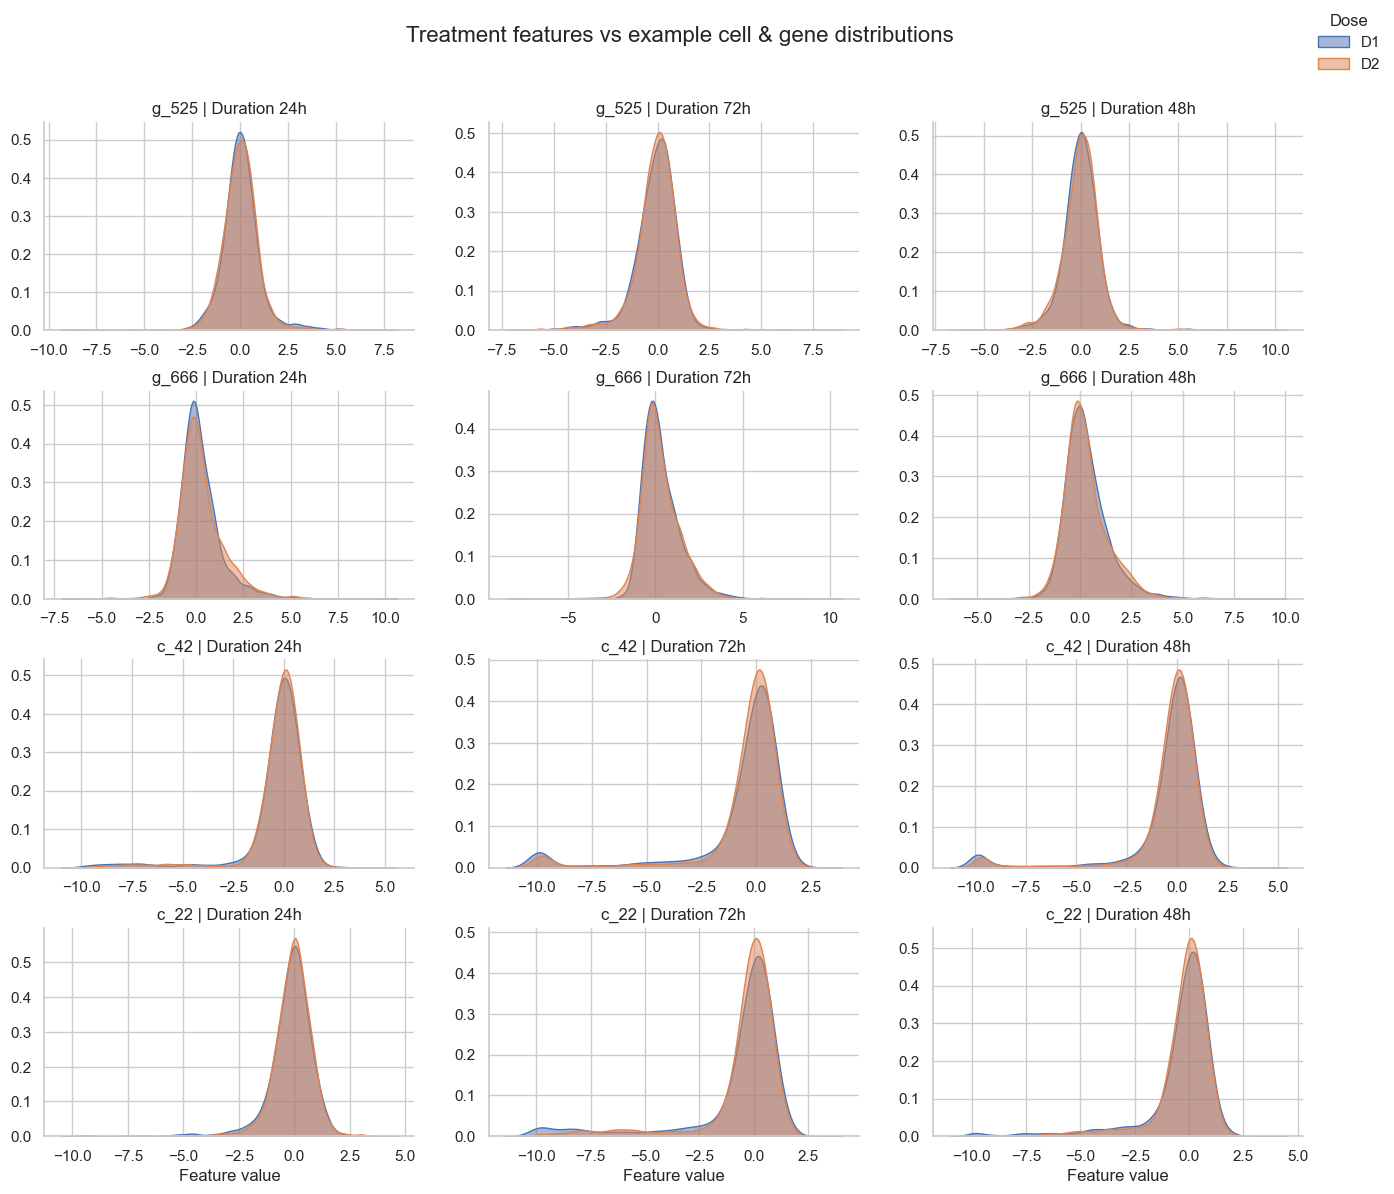

In [25]:
# Clean column names using pandas (if necessary)
train.columns = train.columns.str.replace('-', '_')

# Select specific columns
selected_data = train[['cp_dose', 'cp_time', 'g_525', 'g_666', 'c_42', 'c_22']]

# Modify 'cp_time' to include 'Duration ' and 'h'
selected_data['cp_time'] = 'Duration ' + selected_data['cp_time'].astype(str) + 'h'

# Pivot the DataFrame from wide to long format
long_data = pd.melt(selected_data, id_vars=['cp_dose', 'cp_time'], 
                    value_vars=['g_525', 'g_666', 'c_42', 'c_22'], 
                    var_name='feature', value_name='value')

# Plotting
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Create a faceted density plot
g = sns.FacetGrid(long_data, row='feature', col='cp_time', hue='cp_dose', 
                  aspect=1.5, height=3, sharex=False, sharey=False)

# Map the density plot onto the FacetGrid
g.map(sns.kdeplot, 'value', fill=True, alpha=0.5)

# Customize the plot to match the R plot
g.add_legend(title='Dose', loc='upper right')
g.set_axis_labels('Feature value', '')
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.fig.subplots_adjust(top=0.9)  # Adjust the top space for the title
g.fig.suptitle('Treatment features vs example cell & gene distributions', fontsize=16)

# Display the plot
plt.show()


<div class="alert alert-block alert-info">

We find:

There is almost no difference between the doses in each facet: the colours overlap near perfectly.

Similarly, any deviations between treatment durations on the same gene or cell feature are marginal at best.
</div>

# Non-scored targets

So far, we have been largely ignoring the non-scored target data provided in train_targets_nonscored.csv, other than peeking into it and noticing its sparsity at the beginning. 

In [30]:

# 1. Creating 'rowstats_non' DataFrame

# Remove 'sig_id' column and calculate row sums
rowstats_non = train.drop(columns=['sig_id']).sum(axis=1)

# Convert to DataFrame and rename the column to 'sum'
rowstats_non = pd.DataFrame(rowstats_non, columns=['sum'])

# 2. Creating 'target_sums_non' DataFrame

# Remove 'sig_id' column and calculate column sums
target_sums_non = train.drop(columns=['sig_id']).sum()

# Convert to DataFrame, reset index, and rename columns
target_sums_non = target_sums_non.reset_index()
target_sums_non.columns = ['target', 'sum']

# Display the DataFrames
print("rowstats_non:\n", rowstats_non.head())
print("\ntarget_sums_non:\n", target_sums_non.head())


/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_63304/1145126580.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowstats_non = train.drop(columns=['sig_id']).sum(axis=1)


rowstats_non:
         sum
0   47.7785
1  107.6714
2   15.9554
3 -128.7001
4   73.6422

target_sums_non:
     target                                                sum
0  cp_type  trt_cptrt_cptrt_cptrt_cptrt_cptrt_cptrt_cptrt_...
1  cp_time                                            1143552
2  cp_dose  D1D1D1D1D2D1D2D1D1D2D2D2D1D2D1D1D1D2D2D1D2D1D1...
3      g_0                                          5914.5949
4      g_1                                         -2278.6157


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'rowstats_non' and 'target_sums_non' are your DataFrames

# Ensure 'sum' column in 'rowstats_non' is numeric
rowstats_non['sum'] = pd.to_numeric(rowstats_non['sum'], errors='coerce')

# Ensure 'sum' column in 'target_sums_non' is numeric
target_sums_non['sum'] = pd.to_numeric(target_sums_non['sum'], errors='coerce')

# Plot 1: Number of Activations per Sample Row
p1_data = rowstats_non['sum'].value_counts().reset_index()
p1_data.columns = ['sum', 'n']
p1_data['total'] = p1_data['n'].sum()
p1_data['perc'] = p1_data['n'] / p1_data['total']

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(data=p1_data, x='sum', y='n', hue='sum', palette='Set2')
for index, row in p1_data.iterrows():
    plt.text(index, row['n'] + 1000, f"{row['perc']:.2%}", ha='center', va='bottom')
plt.title("Number of Activations per Sample Row")
plt.xlabel("")
plt.ylabel("")
plt.legend().remove()

# Plot 2: MoA count per target class
plt.subplot(2, 2, 3)
sns.kdeplot(data=target_sums_non, x='sum', fill=True, color="darkorange")
plt.axvline(x=6, linestyle='--', color='black')
plt.xscale('log')
plt.xticks([0, 10, 20, 50, 100])
plt.title("MoA count per target class")
plt.xlabel("")
plt.ylabel("")
plt.legend().remove()
plt.text(0.5, 0.95, 'Dashed line: 6', ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

# Plot 3: Classes with most MoAs
top_classes = target_sums_non.sort_values(by='sum', ascending=False).head(5)
top_classes['target'] = top_classes['target'].str.replace('_', ' ')
top_classes = top_classes.sort_values('sum', ascending=False)

plt.subplot(2, 2, 4)
sns.barplot(data=top_classes, x='sum', y='target', palette='Blues_d')
plt.title("Classes with most MoAs")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
plt.legend().remove()

plt.suptitle('Non-scored target data', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_63304/13855628.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_classes, x='sum', y='target', palette='Blues_d')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_63304/13855628.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


ValueError: Image size of 1037x134016 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x800 with 3 Axes>

/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_63304/148554300.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=filtered_data, y='type', x='n', palette='viridis')
/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_63304/148554300.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([fill(label, 25) for label in filtered_data['type']])


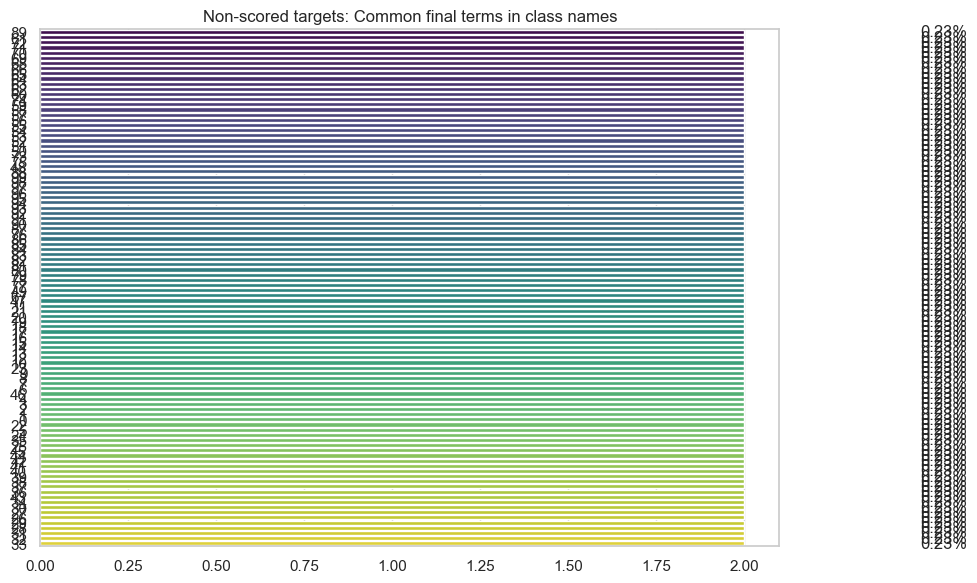

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap

# Assuming 'target_sums_non' is your DataFrame

# Separate the 'target' column into multiple components
separated_data = target_sums_non['target'].str.split('_', expand=True)

# Get the last non-NA column as 'type'
separated_data['type'] = separated_data.ffill(axis=1).iloc[:, -1]

# Count occurrences of 'type'
type_counts = separated_data['type'].value_counts().reset_index()
type_counts.columns = ['type', 'n']

# Calculate the total and percentages
type_counts['total'] = type_counts['n'].sum()
type_counts['perc'] = type_counts['n'] / type_counts['total']

# Filter out rows where count is 1 or less
filtered_data = type_counts[type_counts['n'] > 1]

# Plotting
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Create a bar plot
ax = sns.barplot(data=filtered_data, y='type', x='n', palette='viridis')

# Add text annotations
for index, row in filtered_data.iterrows():
    ax.text(row['n'] + 0.5, index, f"{row['perc']:.2%}", va='center')

# Customize the plot
ax.set_title("Non-scored targets: Common final terms in class names")
ax.set_xlabel("")
ax.set_ylabel("")

# Wrap x-axis labels
ax.set_yticklabels([fill(label, 25) for label in filtered_data['type']])

# Remove the legend
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


# Dimensionality reduction via PCA

Given the notable amount of correlations in the gene and, especially, the cell features, let’s test some dimensionality reduction methods, to see by how much we could reduce our feature space.

Here, we will focus on principal component analysis (PCA). PCA is essentially a rotation of the parameter space so that the new axes (the “principal components” aka PC) are orthogonal and align with the directions of maximum variance. We’ll start with the gene features, then look at the cell features.

### Gene features

In [60]:
# Assuming 'train' is your DataFrame
g_columns = train.filter(like='g_', axis=1)

# Drop the 'sig_id' column if it is included in the selection
g_columns = g_columns.drop(columns=['sig_id'], errors='ignore')

g_columns

,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,...,g_762,g_763,g_764,g_765,g_766,g_767,g_768,g_769,g_770,g_771
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,...,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968,-0.0224
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,...,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289,-0.2718
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,...,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133,0.7923
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,...,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588,-0.0343
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,...,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000,-0.6269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,...,0.7790,0.5393,0.4112,-0.5059,0.0240,-0.2297,0.7221,0.5099,-0.1423,0.3806
23810,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,...,-0.0858,0.3606,-0.0248,0.0672,-0.5901,-0.1022,0.5247,0.5438,-0.1875,-0.4751
23811,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,...,0.1796,0.3488,0.0927,0.5166,-0.3099,-0.5946,0.9778,0.2326,-0.6191,0.3603
23812,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,...,-0.1410,1.9590,0.8224,1.2500,-3.1930,-2.8720,0.1794,0.3109,-0.3491,-0.4741


In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Check if the DataFrame X is empty
if g_columns.empty:
    raise ValueError("The DataFrame 'X' is empty. No columns starting with 'g-' found.")

# Ensure all columns are numeric
if not all(g_columns.dtypes.apply(lambda x: np.issubdtype(x, np.number))):
    raise ValueError("Not all selected columns are numeric.")

# Handle NaN values (you can choose to drop them or fill them, depending on your requirements)
X = g_columns.dropna()  # Option to drop rows with NaN values
# X = X.fillna(0)  # Option to fill NaN values with 0 or another value

# Standardize the features (center and scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert PCA results to a DataFrame for easier interpretation
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Display the PCA DataFrame
print(pca_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -5.979264  1.550012 -0.502657 -7.610341 -2.050595 -5.608992  0.569159   
1 -4.980401 -3.846588  7.405576  4.088724  1.163923  4.233157  1.971495   
2 -1.277123 -2.626640 -3.098642  5.160985  0.862044 -0.332660  2.230737   
3  6.386498  2.626036 -5.265179  8.992739 -0.707729 -6.287851  2.813483   
4 -5.556092 -0.921688  4.123502  8.539803 -1.471287 -3.358239 -1.307632   

        PC8       PC9      PC10  ...     PC763     PC764     PC765     PC766  \
0  3.113275  2.178552 -1.522741  ... -0.052532 -0.162400  0.182526 -0.194788   
1  1.358631 -0.273302  1.218732  ... -0.082760  0.314367  0.026120  0.079278   
2 -2.632508  0.090752 -3.745919  ... -0.674081  0.296179 -0.175297  0.335670   
3 -6.799060  0.356779  3.625552  ...  0.152943  0.327477  0.060372  0.243241   
4 -0.794091 -7.106465  3.995367  ...  0.099229  0.061691  0.051098 -0.268136   

      PC767     PC768     PC769     PC770     PC771     PC772  
0 -0

Our first plot will show the amount of variance explained by each PC for the first 5 PCs (a “Scree Plot”), alongside the direction and magnitude (colour) of the contribution of the original features to the first 2 PCs. The PCA visuals are produced via the excellent factoextra package.

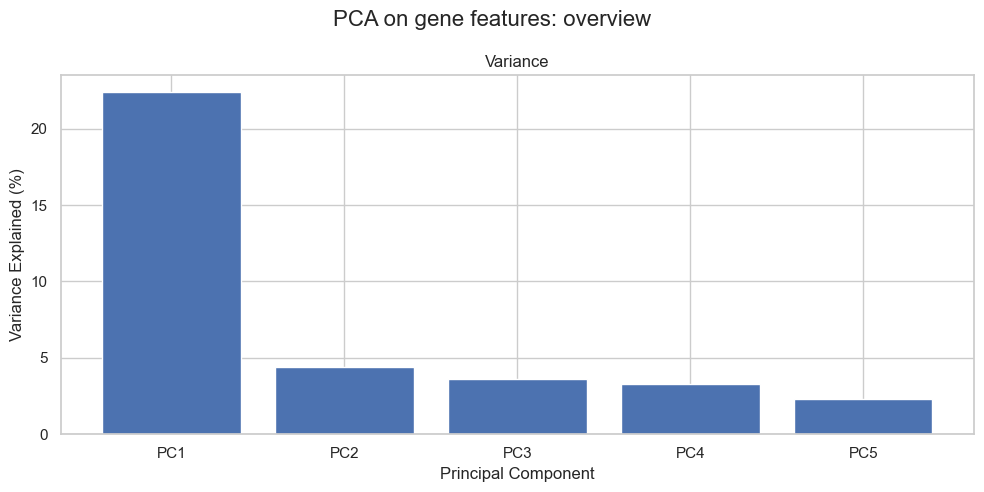

In [76]:
pca.fit(X_scaled)

# Create explained variance plot (Scree plot)
plt.figure(figsize=(10, 5))
explained_variance = pca.explained_variance_ratio_[:5] * 100
plt.bar(range(1, 6), explained_variance, tick_label=[f'PC{i}' for i in range(1, 6)])
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Variance')

# Calculate the contributions of variables to the first two principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
contrib = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=g_columns.columns)

plt.tight_layout()
plt.suptitle('PCA on gene features: overview', fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()


The variables plot in the right panel above already shows that many variables contribute in similar ways to the first 2 PCs. Here, we can have a closer look at those specific features. I’m showing the top 15 variables in each PC dimension. (The dashed horizontal line shows the expected value for a uniform distribution):

/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_63304/1918461753.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contrib_pc1.values, y=contrib_pc1.index, palette='viridis')
/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_63304/1918461753.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contrib_pc2.values, y=contrib_pc2.index, palette='viridis')


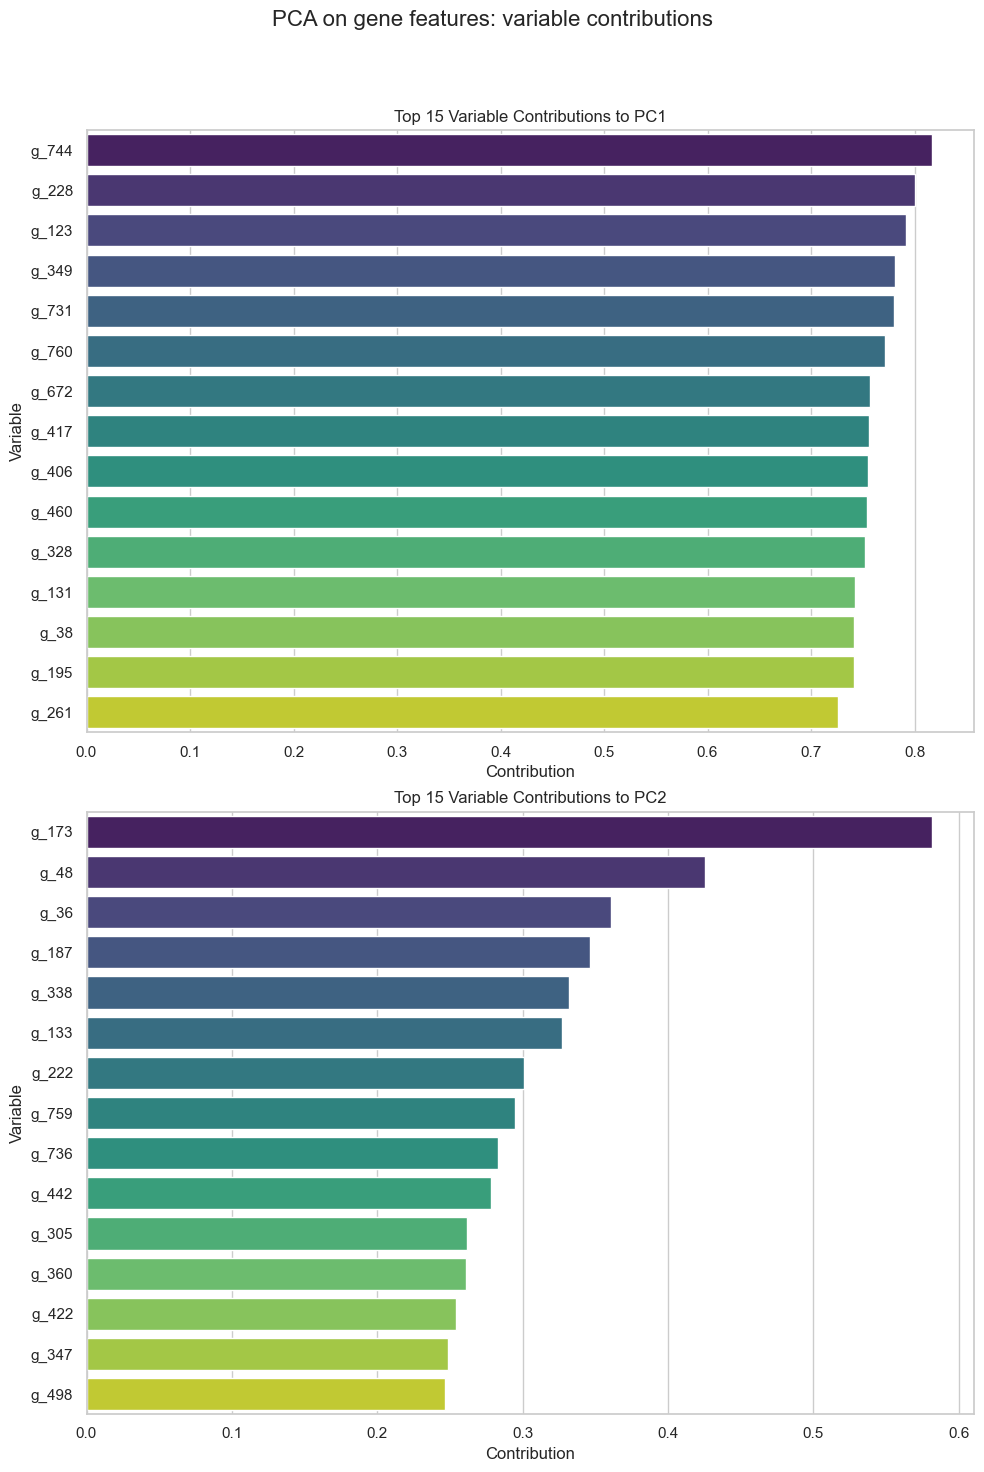

In [79]:
# Calculate the loadings (correlations between original variables and principal components)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Calculate contributions (squared loadings)
contrib = pd.DataFrame(loadings**2, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=g_columns.columns)

# Plot the top 15 contributing variables for PC1
plt.figure(figsize=(10, 15))
plt.subplot(2, 1, 1)
contrib_pc1 = contrib['PC1'].sort_values(ascending=False).head(15)
sns.barplot(x=contrib_pc1.values, y=contrib_pc1.index, palette='viridis')
plt.title('Top 15 Variable Contributions to PC1')
plt.xlabel('Contribution')
plt.ylabel('Variable')

# Plot the top 15 contributing variables for PC2
plt.subplot(2, 1, 2)
contrib_pc2 = contrib['PC2'].sort_values(ascending=False).head(15)
sns.barplot(x=contrib_pc2.values, y=contrib_pc2.index, palette='viridis')
plt.title('Top 15 Variable Contributions to PC2')
plt.xlabel('Contribution')
plt.ylabel('Variable')

plt.tight_layout()
plt.suptitle('PCA on gene features: variable contributions', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()


Now that we have the principal components, we can look at the data distribution in the new parameter space. To detect promising clusters, we will colour-code the data points by the values of the treatment features (type, dose, duration) as well as the (rowwise) sum of the MoAs: